### Load useful packages

In [84]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from datetime import datetime
import numpy as np
import pyproj
from dask.diagnostics import ProgressBar
import matplotlib.dates as mdate
import intake

### Import SIC satellite observations

In [5]:
ds = xr.open_mfdataset("SICdata/AMSR*.nc", combine='by_coords')

### Import cmip6 SIC data

In [85]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [86]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon','Ofx'], 
                 variable_id=['siconc','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [100]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [101]:
dset_dict.keys()

dict_keys(['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn'])

In [106]:
areacello = dset_dict[list(dset_dict.keys())[0]].isel(member_id = 0).squeeze()
cmip_si = dset_dict[list(dset_dict.keys())[1]]

### Calculate the area weighted SIC from cmip

In [120]:
areac = areacello.areacello.where((areacello.lat>=70) & (areacello.lat<=85) & (areacello.lon <= 10) & (areacello.lon >= -10), drop = True)

In [112]:
# average over the ensembles
cmip_si_en = cmip_si.mean(dim = ['member_id'], keep_attrs=True)
# select area of interest: Greenland
cmip_si_GL = cmip_si_en.where((cmip_si_en.lon>=-10) & (cmip_si_en.lon<=10) & (cmip_si_en.lat <=85 ) & (cmip_si_en.lat >= 70),drop = True)

# create a monthly mean
#mon_cmip_si_GL = cmip_si_GL.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

In [114]:
areac

<xarray.DataArray 'areacello' (y: 29, x: 18)>
dask.array<where, shape=(29, 18), dtype=float32, chunksize=(29, 18), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    member_id  <U9 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_methods:      area: sum
    description:       Cell areas for any grid used to report ocean variables...
    history:           none
    long_name:         Grid-Cell Area
    online_operation:  once
    standard_name:     cell_area
    units:             m2

In [123]:
#Totalarea = area.sum(dim=('x','y'))
cmip_iceExtent = (xr.where(cmip_si_GL['siconc']>15, 1.,0)*areac).sum(dim=['x','y'])
#iceExt_monthly = iceExtent.groupby('time.month').mean().compute()

In [124]:
cmip_iceExtent

<xarray.DataArray (time: 1980)>
dask.array<sum-aggregate, shape=(1980,), dtype=float64, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type       |S6 b'typesi'
    member_id  <U9 'r1i1p1f2'

In [129]:
areac

<xarray.DataArray 'areacello' (y: 29, x: 18)>
dask.array<where, shape=(29, 18), dtype=float32, chunksize=(29, 18), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    member_id  <U9 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_methods:      area: sum
    description:       Cell areas for any grid used to report ocean variables...
    history:           none
    long_name:         Grid-Cell Area
    online_operation:  once
    standard_name:     cell_area
    units:             m2

In [132]:
cmip_iceExt_monthly = cmip_iceExtent.groupby('time.month').mean().compute()

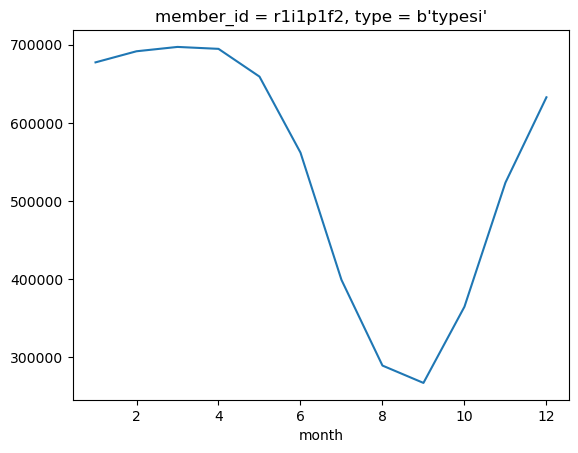

In [133]:
(cmip_iceExt_monthly/1e6).plot()

### Change co-ordinates from x,y to lat,lon

In [6]:
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file
projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)

xx, yy = np.meshgrid( ds.x.values, ds.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
ds['lon'] = (('y','x'),lon)
ds['lat'] = (('y','x'),lat)

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_338/2780275340.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.tr

### Select area of interest: Greenland Sea
* Longitude min = -10
* Longitude maz = 10
* Latitude min = 70
* Latitude max = 85

In [7]:
dsGL = ds.where((ds.lon>=-10) & (ds.lon<=10) & (ds.lat <=85 )  & (ds.lat >= 70),drop = True)

### Determine the monthly mean SIC 
* 2002 to 2019

In [27]:
siGL_mon = dsGL.z.groupby('time.month').mean(dim = ["time","x","y"],keep_attrs=True).compute()
#sep = siGL_mon[9].groupby('time.year').mean(dim = ["time","x","y"],keep_attrs=True)
#sep
#plt.plot(sep.year, sep)

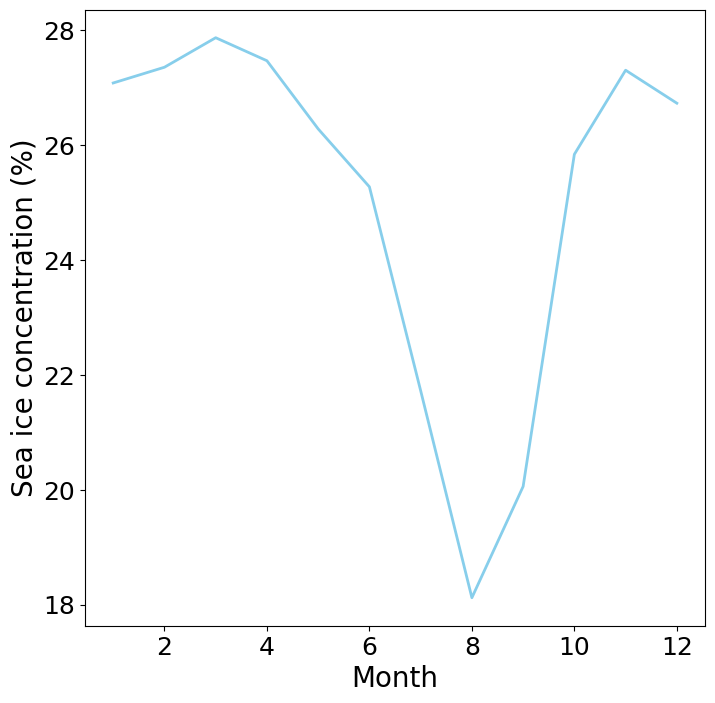

In [37]:
fig, ax = plt.subplots(figsize = (8,8))
with ProgressBar():
    siGL_mon.plot(ax = ax, color='skyblue',
                   lw = 2)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Sea ice concentration (%)', fontsize=18)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)


In [134]:
area = 6.25**2
#Totalarea = area*dsGL.y.size*dsGL.x.size
iceExtent = xr.where(dsGL.z>15, 1.,0).sum(dim=['x','y'])*area
iceExt_monthly = iceExtent.groupby('time.month').mean().compute()


In [111]:
#iceExtent.to_netcdf('AMSR2_E_Daily sea ice extent_GL sea.nc')

In [135]:
iceExt_monthly

<xarray.DataArray 'z' (month: 12)>
array([225792.43321573, 229974.07433185, 234242.92779738, 231845.10940776,
       226404.50684584, 224805.98958333, 200325.2393018 , 166952.98321234,
       174056.12394465, 215371.72140832, 221623.62774451, 222076.61290323])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [87]:
month = range(1,12)
[datetime.strptime(str(m).zfill(2), '%m') for m in month]

[datetime.datetime(1900, 1, 1, 0, 0),
 datetime.datetime(1900, 2, 1, 0, 0),
 datetime.datetime(1900, 3, 1, 0, 0),
 datetime.datetime(1900, 4, 1, 0, 0),
 datetime.datetime(1900, 5, 1, 0, 0),
 datetime.datetime(1900, 6, 1, 0, 0),
 datetime.datetime(1900, 7, 1, 0, 0),
 datetime.datetime(1900, 8, 1, 0, 0),
 datetime.datetime(1900, 9, 1, 0, 0),
 datetime.datetime(1900, 10, 1, 0, 0),
 datetime.datetime(1900, 11, 1, 0, 0)]

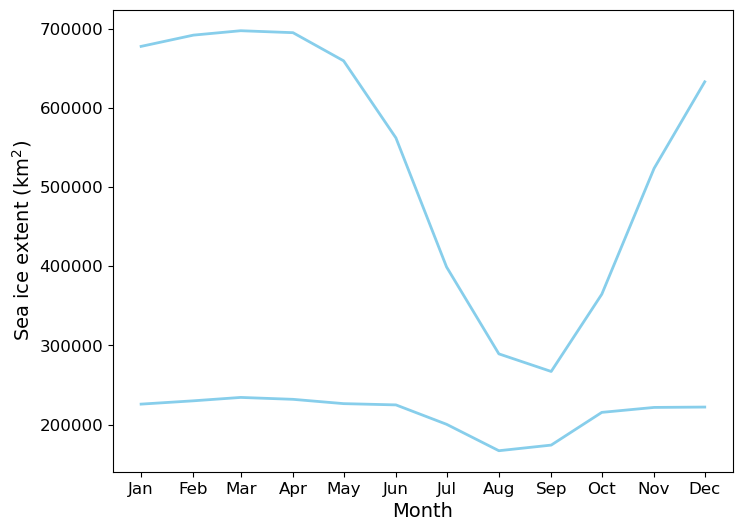

In [138]:
fig, ax = plt.subplots(figsize = (8,6))
with ProgressBar():
    ax.plot([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            iceExt_monthly,
                color='skyblue',
                lw = 2)
ax.plot([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values],
            cmip_iceExt_monthly/1e6,
                color='skyblue',
                lw = 2)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel(r'Sea ice extent (km${^2})$', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(mdate.MonthLocator())


In [96]:
np.array([datetime.strptime(str(m).zfill(2), '%m') for m in iceExt_monthly.month.values])

array([datetime.datetime(1900, 1, 1, 0, 0),
       datetime.datetime(1900, 2, 1, 0, 0),
       datetime.datetime(1900, 3, 1, 0, 0),
       datetime.datetime(1900, 4, 1, 0, 0),
       datetime.datetime(1900, 5, 1, 0, 0),
       datetime.datetime(1900, 6, 1, 0, 0),
       datetime.datetime(1900, 7, 1, 0, 0),
       datetime.datetime(1900, 8, 1, 0, 0),
       datetime.datetime(1900, 9, 1, 0, 0),
       datetime.datetime(1900, 10, 1, 0, 0),
       datetime.datetime(1900, 11, 1, 0, 0),
       datetime.datetime(1900, 12, 1, 0, 0)], dtype=object)

In [90]:
iceExt_monthly.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12